# Getting Familiar with Commonly
# Used Functions
In this chapter, we will have a look at common NumPy functions. In particular,
we will learn how to load data from files by using an example involving
historical stock prices. Also, we will get to see the basic NumPy mathematical
and statistical functions.
We will learn how to read from and write to files. Also, we will get a taste of the
functional programming and linear algebra possibilities in NumPy

In [1]:
import numpy as np
i2 = np.eye(2)
print(i2)

[[1. 0.]
 [0. 1.]]


In [2]:
np.savetxt("eye.txt", i2)

# Time for action – loading from CSV files
How do we deal with CSV files? Luckily, the loadtxt() function can conveniently read CSV
files, split up the fields, and load the data into NumPy arrays. In the following example, we
will load historical stock price data for Apple (the company, not the fruit). The data is in CSV
format and is part of the code bundle for this book. The first column contains a symbol that
identifies the stock. In our case, it is AAPL. Second is the date in dd-mm-yyyy format. The
third column is empty. Then, in order, we have the open, high, low, and close price. Last,
but not least, is the trading volume of the day. This is what a line looks like:<br>
<b>date, symbol      , ,open  ,heigh, low  ,close , volume<br></b>
     28-01-2011, WLTW ,344.17,344.4,333.53,336.1,21144800<br><br>

In [3]:
c,v=np.loadtxt('prices.csv', delimiter=',', usecols=(3,6), unpack=True)
print(c,"===",v)

[214.009998 214.379993 210.969995 ... 116.760002 116.730003 115.82    ] === [1.234324e+08 1.504762e+08 1.380400e+08 ... 2.090590e+07 1.503950e+07
 3.058630e+07]


# Volume Weighted Average Price
Volume Weighted Average Price (VWAP) is a very important quantity in finance. It represents
an average price for a financial asset (see https://www.khanacademy.org/math/
probability/descriptive-statistics/old-stats-videos/v/statistics-theaverage).
The higher the volume, the more significant a price move typically is. VWAP is
often used in algorithmic trading and is calculated using volume values as weights

In [4]:
import numpy as np
c,v=np.loadtxt('prices.csv', delimiter=',', usecols=(3,6),
unpack=True)
vwap = np.average(c, weights=v)
print("VWAP =", vwap)
print(c,v)


VWAP = 361.2303447117271
[214.009998 214.379993 210.969995 ... 116.760002 116.730003 115.82    ] [1.234324e+08 1.504762e+08 1.380400e+08 ... 2.090590e+07 1.503950e+07
 3.058630e+07]


# What just happened?
That wasn't very hard, was it? We just called the average() function and set its weights
parameter to use the v array for weights. By the way, NumPy also has a function to calculate
the arithmetic mean. This is an unweighted average with all the weights equal to 1.
# weights : array_like, optional

An array of weights associated with the values in a. Each value in a contributes to the average according to its associated weight. The weights array can either be 1-D (in which case its length must be the size of a along the given axis) or of the same shape as a. If weights=None, then all data in a are assumed to have a weight equal to one.

# The mean() function
The mean() function is quite friendly and not so mean. This function calculates the
arithmetic mean of an array.

In [5]:
print("mean =", np.mean(c))

mean = 312.9270656379114


# Time-weighted average price
In finance, time-weighted average price (TWAP) is another average price measure. Now that
we are at it, let's compute the TWAP too. It is just a variation on a theme really. The idea is
that recent price quotes are more important, so we should give recent prices higher weights.
The easiest way is to create an array with the arange() function of increasing values from
zero to the number of elements in the close price array. This is not necessarily the correct
way. In fact, most of the examples concerning stock price analysis in this book are only
illustrative. The following is the TWAP code:


# Value range
Usually, we don't only want to know the average or arithmetic mean of a set of values,
which are in the middle, to know we also want the extremes, the full range—the highest and
lowest values. The sample data that we are using here already has those values per day—the
high and low price. However, we need to know the highest value of the high price and the
lowest price value of the low price.
# Time for action – finding highest and lowest values
The min() and max() functions are the answer for our requirement. Perform the following
steps to find the highest and lowest values:

In [6]:
h,l=np.loadtxt('prices.csv', delimiter=',', usecols=(4,5),
unpack=True)

In [7]:
print("highest =", np.max(h))
print("lowest =", np.min(l))


highest = 699.569977
lowest = 90.699997


NumPy allows us to compute the spread of an array with a function called ptp().
The ptp() function returns the difference between the maximum and minimum
values of an array. In other words, it is equal to max(array)—min(array). Call
the ptp() function:

In [8]:
print("Spread high price", np.ptp(h))
print("Spread low price", np.ptp(l))

Spread high price 610.099976
Spread low price 614.370026


In [9]:
print("Spread high price", np.max(h)-np.min(h))
print("Spread low price", np.max(l)-np.min(l))

Spread high price 610.099976
Spread low price 614.370026


# What just happened?
We defined a range of highest to lowest values for the price. The highest value was given by
applying the max() function to the high price array. Similarly, the lowest value was found
by calling the min() function to the low price array. We also calculated the peak-to-peak
distance with the ptp() function:

In [10]:
h,l=np.loadtxt('prices.csv', delimiter=',', usecols=(4,5), unpack=True)
print("highest =", np.max(h))
print("lowest =", np.min(l))
print((np.max(h) + np.min(l)) /2)
print("Spread high price", np.ptp(h))
print("Spread low price", np.ptp(l))


highest = 699.569977
lowest = 90.699997
395.134987
Spread high price 610.099976
Spread low price 614.370026


# Statistics
Stock traders are interested in the most probable close price. Common sense says that
this should be close to some kind of an average as the price dances around a mean, due to
random fluctuations. The arithmetic mean and weighted average are ways to find the center
of a distribution of values. However, neither are robust and both are sensitive to outliers.
Outliers are extreme values that are much bigger or smaller than the typical values in a
dataset. Usually, outliers are caused by a rare phenomenon or a measurement error. For
instance, if we have a close price value of a million dollars, this will influence the outcome
of our calculations.
# Time for action – performing simple statistics
We can use some kind of threshold to weed out outliers, but there is a better way. It is called
the median, and it basically picks the middle value of a sorted set of values (see https://
www.khanacademy.org/math/probability/descriptive-statistics/central_
tendency/e/mean_median_and_mode). One half of the data is below the median and the
other half is above it. For example, if we have the values of 1, 2, 3, 4, and 5, then the median
will be 3, since it is in the middle. 

In [11]:
c=np.loadtxt('prices.csv', delimiter=',', usecols=(3,), unpack=True)

In [12]:
c

array([214.009998, 214.379993, 210.969995, ..., 116.760002, 116.730003,
       115.82    ])

In [13]:
print("median =", np.median(c))

median = 318.24000750000005


In [14]:
c=np.arange(45, dtype=float)
sorted_close = np.msort(c)
print("sorted =", sorted_close)

sorted = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44.]


In [15]:
N=len(c)
print("middle", sorted([(N-1)/2]))
print(N)

middle [22.0]
45


Hey, that's a different value than the one the median() function gave us. How
come? Upon further investigation, we find that the median() function return value
doesn't even appear in our file. That's even stranger! Before filing bugs with the
NumPy team, let's have a look at the documentation:


In [16]:
np.median?

This mystery is easy to solve. It turns out that our naive algorithm only works for
arrays with odd lengths. For even-length arrays, the median is calculated from the
average of the two array values in the middle. Therefore, type the following code:


In [17]:
c=np.arange(46)
N=len(c)
print("average middle =", np.sum((sorted([N/2])+sorted([(N-1)/2])))/2)


average middle = 22.75


In [18]:
print("variance =", np.var(c))


variance = 176.25


In [19]:
print("variance from definition =", np.mean((c - c.mean())**2))

variance from definition = 176.25


In [20]:
x=np.arange(28,33)
print(x)
print(np.sum((x-x.mean())**2)/len(x))
print("with np function=",np.var(x))

[28 29 30 31 32]
2.0
with np function= 2.0


Another statistical measure that we are concerned with is variance. Variance tells
us how much a variable varies (see https://www.khanacademy.org/math/
probability/descriptive-statistics/variance_std_deviation/e/
variance). In our case, it also tells us how risky an investment is, since a stock
price that varies too wildly is bound to get us into trouble.
Calculate the variance of the close price (with NumPy, this is just a one-liner):

In [21]:
print("variance =", np.var(c))

variance = 176.25


In [22]:
import numpy as np
c=np.arange(50, dtype=float)
print("median =", np.median(c))
sorted = np.msort(c)
print("sorted =", sorted)
N = len(c)
print(N)
print("middle =", sorted[int((N - 1)/2)])
print("average middle =", np.average)
print("variance =", np.var(c))
print("variance from definition =", np.mean((x - x.mean())**2))

median = 24.5
sorted = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
50
middle = 24.0
average middle = <function average at 0x00000178FC247620>
variance = 208.25
variance from definition = 2.0


In [23]:
returns=np.diff(c)/c[:-1]
print(c,"=d=====")
print(returns)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.] =d=====
[       inf 1.         0.5        0.33333333 0.25       0.2
 0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
 0.08333333 0.07692308 0.07142857 0.06666667 0.0625     0.05882353
 0.05555556 0.05263158 0.05       0.04761905 0.04545455 0.04347826
 0.04166667 0.04       0.03846154 0.03703704 0.03571429 0.03448276
 0.03333333 0.03225806 0.03125    0.03030303 0.02941176 0.02857143
 0.02777778 0.02702703 0.02631579 0.02564103 0.025      0.02439024
 0.02380952 0.02325581 0.02272727 0.02222222 0.02173913 0.0212766
 0.02083333]


C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [24]:
print("Standard deviation =", np.std(c))

Standard deviation = 14.430869689661812


The log return or logarithmic return is even easier to calculate. Use the log()
function to get the natural logarithm of the close price and then unleash the
diff() function on the result:

In [25]:
logreturns = np.diff(np.log(c))
logreturns

C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       inf, 0.69314718, 0.40546511, 0.28768207, 0.22314355,
       0.18232156, 0.15415068, 0.13353139, 0.11778304, 0.10536052,
       0.09531018, 0.08701138, 0.08004271, 0.07410797, 0.06899287,
       0.06453852, 0.06062462, 0.05715841, 0.05406722, 0.05129329,
       0.04879016, 0.04652002, 0.04445176, 0.04255961, 0.04082199,
       0.03922071, 0.03774033, 0.03636764, 0.03509132, 0.03390155,
       0.03278982, 0.0317487 , 0.03077166, 0.02985296, 0.02898754,
       0.02817088, 0.02739897, 0.02666825, 0.02597549, 0.02531781,
       0.02469261, 0.02409755, 0.0235305 , 0.02298952, 0.02247286,
       0.02197891, 0.02150621, 0.02105341, 0.02061929])

Quite likely, we will be interested in days when the return is positive. In the current
setup, we can get the next best thing with the where() function, which returns the
indices of an array that satisfies a condition. Just type the following code:

In [26]:
posretindices = np.where(returns > 0)
print("Indices with positive returns", posretindices)

Indices with positive returns (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64),)


In investing, volatility measures price variation of a financial security. Historical
volatility is calculated from historical price data. The logarithmic returns are
interesting if you want to know the historical volatility—for instance, the annualized
or monthly volatility. The annualized volatility is equal to the standard deviation of
the log returns as a ratio of its mean, divided by one over the square root of the
number of business days in a year, usually one assumes 252. Calculate it with the
std() and mean() functions, as in the following code:

In [27]:
annual_volatility = np.std(logreturns)/np.mean(logreturns)
annual_volatility = annual_volatility / np.sqrt(1./252.)
print(annual_volatility)

nan


C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [28]:
print("Monthly volatility", annual_volatility * np.sqrt(1./12.))

Monthly volatility nan


In [29]:
c=np.arange(0,150,3)
returns = np.diff( c ) / c[ : -1]
print("Standard deviation =", np.std(c))
logreturns = np.diff( np.log(c) )
posretindices = np.where(returns > 0)
print("Indices with positive returns", posretindices)
annual_volatility = np.std(logreturns)/np.mean(logreturns)
annual_volatility = annual_volatility / np.sqrt(1./252.)
#print("Annual volatility", annual_volatility)
#print("Monthly volatility", annual_volatility * np.sqrt(1./12.))
#print("logreturn",logreturns)

Standard deviation = 43.292609068985435
Indices with positive returns (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64),)


C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [30]:
print(np.where(c<30))
print(np.take(c,np.where(c<30)))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)
[[ 0  3  6  9 12 15 18 21 24 27]]


# Dates
Do you sometimes have the Monday blues or Friday fever? Ever wondered whether
the stock market suffers from these phenomena? Well, I think this certainly warrants
extensive research.
# Time for action – dealing with dates
First, we will read the close price data. Second, we will split the prices according to the day
of the week. Third, for each weekday, we will calculate the average price. Finally, we will
find out which day of the week has the highest average and which has the lowest average.
A word of warning before we commence: you might be tempted to use the result to buy
stock on one day and sell on the other. However, we don't have enough data to make this
kind of decisions.

In [31]:
import datetime
def dates2num(s):
    return datetime.datetime.strptime(s, "%d-%m-%Y").date().weekday()

In [32]:
dates2num('28-01-2011')

4

In [33]:

dates, price, close=np.loadtxt('prices.csv', delimiter=',', usecols=(0,2,3), converters={1: dates2num}, unpack=True, dtype='str')
dates
dates=list(map(dates2num, dates))
dates=np.asanyarray(dates,'f')
dates

array([0., 1., 2., ..., 2., 3., 4.], dtype=float32)

In [34]:
close = np.asanyarray(close,'f')
close

array([214.01   , 214.37999, 210.97   , ..., 116.76   , 116.73   ,
       115.82   ], dtype=float32)

In [35]:
price = np.asarray(price,'d')
price

array([213.429998, 214.599998, 214.379993, ..., 117.519997, 116.449997,
       116.650002])

In [36]:
averages = np.zeros(5)
averages

array([0., 0., 0., 0., 0.])

In [37]:

for i in range(5):
    indices = np.where(dates == i)
    prices = np.take(close, indices)
    avg = np.mean(prices)
    print("Day", i, "prices", prices, "Average", avg)
    averages[i] = avg


Day 0 prices [[214.01    210.11    203.07    194.73    194.12    200.42    208.99
  219.07999 223.84    224.75    232.39    238.49    242.29001 247.07
  269.5     266.35    253.99    254.22    246.76    250.94    254.28
  270.17    268.3     257.29    245.58002 259.28    261.85    261.75
  247.64    245.79999 242.5     267.04    283.23    291.15997 278.63998
  295.36002 318.      308.84    304.18    318.62    307.04    313.36
  316.87    320.15    321.67    322.21    324.68002 329.57    342.45
  337.44998 339.32    351.88    359.18    353.21002 355.36    353.56
  339.3     350.44    341.19    330.8     331.85    353.01    346.28
  347.6     333.3     334.4     338.03998 326.6     315.32    332.03998
  354.      373.80002 398.5     396.75    353.21002 383.41    356.43997
  389.97    379.94    411.63    403.17    374.6     388.81    419.99002
  405.77002 404.78    399.73    379.26    369.01    376.12    393.01
  391.84    382.21    421.73    427.41    453.01    463.96997 502.6
  525.76  

1. If you want, you can go ahead and find out which day has the highest average, and
which the lowest. However, it is just as easy to find this out with the max() and
min() functions, as shown here:

In [38]:
top = np.max(averages)
print("Highest average", top)
print("Top day of the week", np.argmax(averages))
bottom = np.min(averages)
print("Lowest average", bottom)
print("Bottom day of the week", np.argmin(averages))

Highest average 314.54107666015625
Top day of the week 4
Lowest average 311.6773986816406
Bottom day of the week 2


# What just happened?
The argmin() function returned the index of the lowest value in the averages array.
The index returned was 4, which corresponds to Friday. The argmax() function returned
the index of the highest value in the averages array. The index returned was 2, which
corresponds to Wednesday 

In [39]:
import numpy as np
import datetime
# Monday 0
# Tuesday 1
# Wednesday 2
# Thursday 3
# Friday 4
# Saturday 5
# Sunday 6
def datestr2num(s):
    return datetime.datetime.strptime(s, "%d-%m-%Y").date().weekday()

In [40]:
dates,price, close=np.loadtxt('prices.csv', delimiter=',', usecols=(0,2,3),
converters={1: datestr2num}, unpack=True, dtype='str')
price = np.asanyarray(price, 'd')
close = np.asanyarray(close, 'd')


print(price)
print(close)
print("Dates =", dates)

averages = np.zeros(5)
print("average",averages)
dates = list(map(dates2num, dates))
dates = np.asanyarray(dates,'f')
print("dates",dates)

[213.429998 214.599998 214.379993 ... 117.519997 116.449997 116.650002]
[214.009998 214.379993 210.969995 ... 116.760002 116.730003 115.82    ]
Dates = ['04-01-2010' '05-01-2010' '06-01-2010' ... '28-12-2016' '29-12-2016'
 '30-12-2016']
average [0. 0. 0. 0. 0.]
dates [0. 1. 2. ... 2. 3. 4.]


In [41]:
for i in range(5):
    indices = np.where(dates == i)
    prices = np.take(close, indices)
    avg = np.mean(prices)
    print("Day", i, "prices", prices, "Average", avg)
    averages[i] = avg


Day 0 prices [[214.009998 210.110003 203.070002 194.729998 194.119997 200.419994
  208.990004 219.079994 223.839996 224.750004 232.389992 238.489998
  242.290005 247.070007 269.5      266.349995 253.990005 254.219997
  246.759987 250.940002 254.279999 270.170002 268.299999 257.290001
  245.580013 259.280006 261.849998 261.749996 247.640007 245.799992
  242.499996 267.039997 283.230007 291.159988 278.639996 295.360004
  317.999989 308.839993 304.179993 318.620003 307.040005 313.359989
  316.870003 320.149998 321.670006 322.209991 324.680008 329.57
  342.450001 337.449993 339.319996 351.87999  359.179996 353.210007
  355.359989 353.560001 339.299995 350.44001  341.189999 330.799988
  331.849998 353.010002 346.279995 347.599998 333.299992 334.39999
  338.039993 326.599998 315.320007 332.039989 354.000011 373.800011
  398.499989 396.749989 353.210007 383.410004 356.439987 389.969994
  379.939991 411.630009 403.170002 374.600002 388.809994 419.990013
  405.770008 404.779999 399.730003 379.2

In [42]:
top = np.max(averages)
print("Highest average", top)
print("Top day of the week", np.argmax(averages))
bottom = np.min(averages)
print("Lowest average", bottom)
print("Bottom day of the week", np.argmin(averages))

Highest average 314.54107699433433
Top day of the week 4
Lowest average 311.6774029475138
Bottom day of the week 2


# Time for action – using the datetime64 data type
The datetime64 data type was introduced in NumPy 1.7.0 (see http://docs.scipy.
org/doc/numpy/reference/arrays.datetime.html).
1. To learn about the datetime64 data type, start a Python shell and import NumPy
as follows

In [43]:
np.datetime64('2015-04-22')

numpy.datetime64('2015-04-22')

In [44]:
local = np.datetime64('2018-01-31T20:19')
local

numpy.datetime64('2018-01-31T20:19')

In [45]:
with_offset = np.datetime64('2018-01-01T20:19-0900')
with_offset

C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  """Entry point for launching an IPython kernel.


numpy.datetime64('2018-01-02T05:19')

In [46]:
local - with_offset


numpy.timedelta64(42660,'m')

In [47]:
 np.arange('2015-04-22', '2015-05-22', 7, dtype='datetime64')

array(['2015-04-22', '2015-04-29', '2015-05-06', '2015-05-13',
       '2015-05-20'], dtype='datetime64[D]')

# Time for action – summarizing data
The data we will summarize will be for a whole business week, running from Monday
to Friday. During the period covered by the data, there was one holiday on February 21,
President's Day. This happened to be a Monday and the US stock exchanges were closed on
this day. As a consequence, there is no entry for this day, in the sample. The first day in the
sample is a Friday, which is inconvenient. Use the following instructions to summarize data:
### 1. To simplify, just have a look at the first three weeks in the sample— later, you can
have a go at improving this:

In [48]:
close = close[:16]
dates = dates[:16]
dates

array([0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 1., 2., 3., 4., 0., 1.],
      dtype=float32)

In [49]:
# get first Monday

first_monday = np.ravel(np.where(dates == 0))[0]
print("The first Monday index is", first_monday)
dates

The first Monday index is 0


array([0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 1., 2., 3., 4., 0., 1.],
      dtype=float32)

. The next logical step is to find the Friday before last Friday in the sample. The
logic is similar to the one for finding the first Monday, and the code for Friday is 4.
Additionally, we are looking for the second to last element with index 2:


In [50]:
# get last Friday
last_friday = np.ravel(np.where(dates == 4))[-1:]
print("The last Friday index is", last_friday)

The last Friday index is [13]


Next, create an array with the indices of all the days in the three weeks:

In [51]:
weeks_indices = np.arange(first_monday, last_friday + 2)
print("Weeks indices initial", weeks_indices)

Weeks indices initial [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


5. Split the array in pieces of size 5 with the split() function:

In [52]:
a = np.split(weeks_indices,3)
a

[array([0, 1, 2, 3, 4], dtype=int64),
 array([5, 6, 7, 8, 9], dtype=int64),
 array([10, 11, 12, 13, 14], dtype=int64)]

This splits the array as follows:

In [53]:
weeksummary = np.apply_along_axis(summarize, 1,weeks_indices, open, high, low, close)
print("Week summary", weeksummary)

NameError: name 'summarize' is not defined

In [54]:
def summarize(a, o, h, l, c):
    monday_open = o[a[0]]
    week_high = np.max( np.take(h, a) )
    week_low = np.min( np.take(l, a) )
    friday_close = c[a[-1]]

    return("APPL", monday_open, week_high, week_low, friday_close)

In [55]:
open, high, low, close = np.loadtxt('prices.csv',delimiter=',' ,unpack=True, usecols=(2,5,4,3), dtype='f')

weeksummary = np.apply_along_axis(summarize, 0 , weeks_indices, open, high, low, close)
print("Week summary", weeksummary)

Week summary ['APPL' '213.43' '215.59' '197.16' '203.07']


In [56]:
np.savetxt("weeksummary.csv", weeksummary, delimiter=",",
fmt="%s")

# What just happened?
We did something that is not even possible in some programming languages. We defined a
function and passed it as an argument to the apply_along_axis() function.<br><br>
Arguments for the summarize() function were neatly passed by apply_along_axis()

In [57]:
from __future__ import print_function
import numpy as np
from datetime import datetime
# Monday 0
# Tuesday 1
# Wednesday 2
# Thursday 3
# Friday 4
# Saturday 5
# Sunday 6
def datestr2num(s):
    return datetime.strptime(s, "%d-%m-%Y").date().weekday()


dates, open, high, low, close=np.loadtxt('prices.csv', delimiter=',',
usecols=(0, 2, 5, 4, 3), converters={1: datestr2num}, unpack=True, dtype='str')
close = np.asarray(close[:16],'f')
open =np.asarray(open[:16],'f')
high = np.asarray(high,'f')
low = np.asarray(low, 'f')

dates = dates[:16]
dates = np.asarray(list(map(datestr2num, dates)),'f')
dates


array([0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 1., 2., 3., 4., 0., 1.],
      dtype=float32)

In [58]:
# get last Friday
last_friday = np.ravel(np.where(dates == 4))[-1]
print("The last Friday index is", last_friday)
weeks_indices = np.arange(first_monday, last_friday + 1)
print("Weeks indices initial", weeks_indices)
weeks_indices = np.split(weeks_indices, 2)
print("Weeks indices after split", weeks_indices)

The last Friday index is 13
Weeks indices initial [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Weeks indices after split [array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13], dtype=int64)]


In [59]:
def summarize(a, o, h, l, c):
    monday_open = o[a[0]]
    week_high = np.max( np.take(h, a) )
    week_low = np.min( np.take(l, a) )
    friday_close = c[a[-1]]
    return "APPL", monday_open, week_high, week_low, friday_close

In [60]:
weeksummary = np.apply_along_axis(summarize,1
                                  , weeks_indices, open, high, low, close)
print("Week summary", weeksummary)
np.savetxt("weeksummary1.csv", weeksummary, delimiter=",", fmt="%s")

Week summary [['APPL' '213.43' '215.59' '206.42' '207.72']
 ['APPL' '207.87' '215.54' '197.16' '197.75']]


# Have a go hero – improving the code
Change the code to deal with a holiday. Time the code to see how big the speedup due to
apply_along_axis() is.

# Average True Range
The Average True Range (ATR) is a technical indicator that measures volatility of stock prices.
The ATR calculation is not important further but will serve as an example of several NumPy
functions, including the maximum() function.


Time for action – calculating the Average True Range
To calculate the ATR, perform the following steps:

In [61]:
N = 5
h = h[-N:]
l = l[-N:]

2.We also need to know the close price of the previous day:

In [62]:
previousclose = c[-N -1: -1]
previousclose

array([132, 135, 138, 141, 144])

In [63]:
h - l

array([-0.930001, -1.310005, -1.82    , -0.709999, -1.769997])

In [64]:
h - previousclose

array([-16.410004, -18.510002, -21.800003, -24.599998, -28.57    ])

In [65]:
previousclose - l

array([15.480003, 17.199997, 19.980003, 23.889999, 26.800003])

In [66]:
truerange = np.maximum(h - l, h - previousclose, previousclose -
l)
truerange

array([-0.930001, -1.310005, -1.82    , -0.709999, -1.769997])

In [67]:
atr = np.zeros(N)
atr

array([0., 0., 0., 0., 0.])

In [68]:
atr[0] = np.mean(truerange)

In [69]:
for i in range(1, N):
    atr[i] = (N - 1) * atr[i - 1] + truerange[i]
    atr[i] /= N

# What just happened?
We formed three arrays, one for each of the three ranges—daily range, the gap between the
high of today and the close of yesterday, and the gap between the close of yesterday and the
low of today. This tells us how much the stock price moved and, therefore, how volatile it is.
The algorithm requires us to find the maximum value for each day. The max() function that
we used before can give us the maximum value within an array, but that is not what we want
here. We need the maximum value across arrays, so we want the maximum value of the first
elements in the three arrays, the second elements, and so on. In preceding Time for action
section, we saw that the maximum() function can do this. After this, we computed a moving
average of the true range values

In [70]:
import numpy as np
h, l, c = np.loadtxt('prices.csv', delimiter=',', usecols=(5,4,3),
unpack=True)
N = 5
h = h[-N:]
l = l[-N:]
print("len(h)", len(h), "len(l)", len(l))
print("Close", c)
previousclose = c[-N -1: -1]
print("len(previousclose)", len(previousclose))
print("Previous close", previousclose)
truerange = np.maximum(h - l, h - previousclose, previousclose - l)
print("True range", truerange)
atr = np.zeros(N)
atr[0] = np.mean(truerange)

for i in range(1, N):
    atr[i] = (N - 1) * atr[i - 1] + truerange[i]
    atr[i] /= N
print("ATR", atr)


len(h) 5 len(l) 5
Close [214.009998 214.379993 210.969995 ... 116.760002 116.730003 115.82    ]
len(previousclose) 5
Previous close [116.290001 116.519997 117.260002 116.760002 116.730003]
True range [0.930001 1.310005 1.82     0.709999 1.769997]
ATR [1.3080004  1.30840132 1.41072106 1.27057664 1.37046072]


In the following sections, we will learn better ways to calculate moving averages.
# Have a go hero – taking the minimum() function for a spin
Besides the maximum() function, there is a minimum() function. You can probably guess
what it does. Make a small script or start an interactive session in IPython to test your
assumptions.

# Simple Moving Average
The Simple Moving Average (SMA) is commonly used to analyze time-series data. To
calculate it, we define a moving window of N periods, N days in our case. We move this
window along the data and calculate the mean of the values inside the window.
# Time for action – computing the Simple Moving Average
The moving average is easy enough to compute with a few loops and the mean() function,
but NumPy has a better alternative—the convolve() function. The SMA is, after all,
nothing more than a convolution with equal weights or, if you like, unweighted.<br><br>
<b>Convolution</b> is a mathematical operation on two functions defined as the
integral of the product of the two functions after one of the functions is
reversed and shifted.


Use the following steps to compute the SMA:
1. Use the ones() function to create an array of size N and elements initialized to 1,
and then, divide the array by N to give us the weights:


In [71]:
N = 5
weights = np.ones(N) / N
print("Weights", weights)

Weights [0.2 0.2 0.2 0.2 0.2]


In [72]:
c = np.loadtxt('prices.csv', delimiter=',', usecols=(3,),
unpack=True)
sma = np.convolve(weights, c)[N-1:-N+1]
sma

array([212.3839982, 211.6039992, 210.2720008, ..., 116.778    ,
       116.712001 , 116.6180008])

[214.009998 214.379993 210.969995 210.58     211.980005 210.110003]


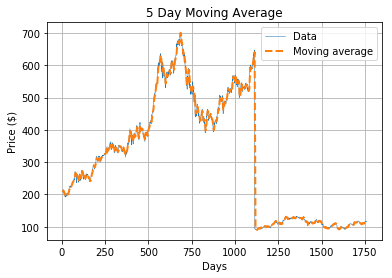

In [73]:
import matplotlib.pyplot as plt

c = np.loadtxt('prices.csv', delimiter=',', usecols=(3,),
unpack=True)
print(c[:6])
sma = np.convolve(weights, c)[N-1:-N+1]
t = np.arange(N - 1, len(c))
plt.plot(t, c[N-1:], lw=0.5, label="Data")
plt.plot(t, sma, '--', lw=2.0, label="Moving average")
plt.title("5 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

# What just happened?
We computed the SMA for the close stock price. It turns out that the SMA is just a signal
processing technique—a convolution with weights 1/N, where N is the size of the moving
average window. We learned that the ones() function can create an array with ones and
the convolve() function calculates the convolution of a dataset with specified weights

Weights [0.2 0.2 0.2 0.2 0.2]
sma [212.3839982 211.6039992 210.2720008 ... 116.778     116.712001
 116.6180008]
c[N-1:] [211.980005 210.110003 207.720001 ... 116.760002 116.730003 115.82    ]


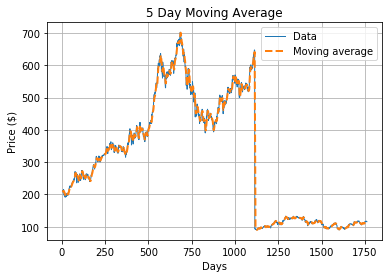

In [74]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
N = 5
weights = np.ones(N) / N
print("Weights", weights)

c = np.loadtxt('prices.csv', delimiter=',', usecols=(3,), unpack=True)
sma = np.convolve(weights, c)[N-1:-N+1]
t = np.arange(N - 1, len(c))
print("sma",sma)
print("c[N-1:]",c[N-1:])
plt.plot(t, c[N-1:], lw=1.0, label="Data")
plt.plot(t, sma, '--', lw=2.0, label="Moving average")
plt.title("5 Day Moving Average")

plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

# Time for action – calculating the Exponential Moving Average
Given an array, the exp() function calculates the exponential of each array element. For
example, look at the following code:
x = np.arange(5)
print("Exp", np.exp(x))

In [75]:
x = np.arange(5)
print("Exp", np.exp(x))


Exp [ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


In [76]:
print("Linspace", np.linspace(-1, 0, 5))

Linspace [-1.   -0.75 -0.5  -0.25  0.  ]


In [77]:
N = 5
weights = np.exp(np.linspace(-1., 0., N))

In [78]:
weights /= weights.sum()
print("Weights", weights)

Weights [0.11405072 0.14644403 0.18803785 0.24144538 0.31002201]


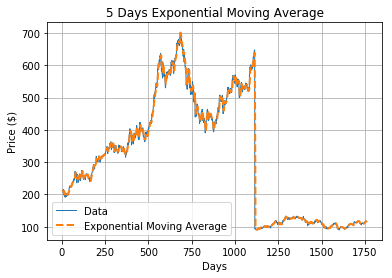

In [79]:
c = np.loadtxt('prices.csv', delimiter=',', usecols=(3,),
unpack=True)
ema = np.convolve(weights, c)[N-1:-N+1]
t = np.arange(N - 1, len(c))
plt.plot(t, c[N-1:], lw=1.0, label='Data')
plt.plot(t, ema, '--', lw=2.0, label='Exponential Moving Average')
plt.title('5 Days Exponential Moving Average')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

# Bollinger Bands
Bollinger Bands are yet another technical indicator. Yes, there are thousands of them. This
one is named after its inventor and indicates a range for the price of a financial security. It
consists of three parts:

# Time for action – enveloping with Bollinger Bands
We already know how to calculate the SMA. So, if you need to refresh your memory, please
review the Time for action – computing the simple average section in this chapter. This
example will introduce the NumPy fill() function. The fill() function sets the value of
an array to a scalar value. The function should be faster than array.flat = scalar or
setting the values of the array one-by-one in a loop. Perform the following steps to envelope
with the Bollinger Bands:

In [80]:
deviation = []
C = len(c)
for i in range(N - 1, C):
    if i + N < C:
        dev = c[i: i + N]
    else:
        dev = c[-N:]

    averages = np.zeros(N)
    averages.fill(sma[i - N - 1])
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
    
deviation = 2 * np.array(deviation)
print(len(deviation), len(sma))
upperBB = sma + deviation
lowerBB = sma - deviation

1758 1758


# What just happened?
We worked out the Bollinger Bands that envelope the close price of our data. More
importantly, we got acquainted with the NumPy fill() function. This function fills
an array with a scalar value. This is the only parameter of the fill() function (see
bollingerbands.py):


Weights [0.2 0.2 0.2 0.2 0.2]
1758 1758
[ 25.83081908  27.27158954 202.16303639 ... 115.83199255 115.69719034
 115.63036398]
[214.009998 214.379993 210.969995 ... 117.059998 116.290001 116.519997]
[398.93717732 395.93640886 218.38096521 ... 117.72400745 117.72681166
 117.60563762]
Ratio between bands 0.9960182025028441


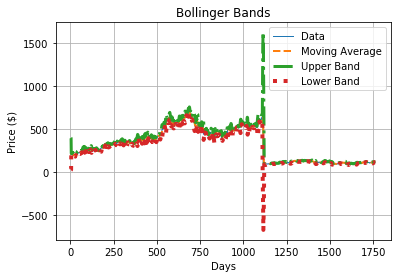

In [81]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
N = 5
weights = np.ones(N) / N
print("Weights", weights)
c = np.loadtxt('prices.csv', delimiter=',', usecols=(3,), unpack=True)
sma = np.convolve(weights, c)[N-1:-N+1]
deviation = []
C = len(c)
for i in range(N - 1, C):
    if i + N < C:
        dev = c[i: i + N]
    else:
        dev = c[-N:]

    averages = np.zeros(N)
    averages.fill(sma[i - N - 1])
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
deviation = 2 * np.array(deviation)
print(len(deviation), len(sma))
upperBB = sma + deviation
lowerBB = sma - deviation
c_slice = c[N-1:]
between_bands = np.where((c_slice < upperBB) & (c_slice > lowerBB))
print(lowerBB[between_bands])
print(c[between_bands])
print(upperBB[between_bands])

between_bands = len(np.ravel(between_bands))
print("Ratio between bands", float(between_bands)/len(c_slice))
t = np.arange(N - 1, C)
plt.plot(t, c_slice, lw=1.0, label='Data')
plt.plot(t, sma, '--', lw=2.0, label='Moving Average')
plt.plot(t, upperBB, '-.', lw=3.0, label='Upper Band')
plt.plot(t, lowerBB, ':', lw=4.0, label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()
plt.show()

# Have a go hero – switching to Exponential Moving Average
It is customary to choose the SMA to center the Bollinger Band on. The second most popular
choice is the EMA, so try that as an exercise. You can find a suitable example in this chapter,
if you need pointers.
Check whether the fill() function is faster or is as fast as array.flat = scalar, or
setting the value in a loop.
# Linear model
Many phenomena in science have a related linear relationship model. The NumPy linalg
package deals with linear algebra computations. We will begin with the assumption that a
price value can be derived from N previous prices based on a linear relationship relation.

# Time for action – predicting price with a linear model
Keeping an open mind, let's assume that we can express a stock price p as a linear
combination of previous values, that is, a sum of those values multiplied by certain
coefficients we need to determine:

In [82]:
b = c[-N:]
b = b[::-1]
print("b", b)

b [115.82     116.730003 116.760002 117.260002 116.519997]


In [83]:
A = np.zeros((N, N), float)
print("Zeros N by N", A)


Zeros N by N [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [84]:
for i in range(N):
    A[i, ] = c[-N - 1 - i: - 1 - i]
    print("A", A)

A [[116.290001 116.519997 117.260002 116.760002 116.730003]
 [  0.         0.         0.         0.         0.      ]
 [  0.         0.         0.         0.         0.      ]
 [  0.         0.         0.         0.         0.      ]
 [  0.         0.         0.         0.         0.      ]]
A [[116.290001 116.519997 117.260002 116.760002 116.730003]
 [117.059998 116.290001 116.519997 117.260002 116.760002]
 [  0.         0.         0.         0.         0.      ]
 [  0.         0.         0.         0.         0.      ]
 [  0.         0.         0.         0.         0.      ]]
A [[116.290001 116.519997 117.260002 116.760002 116.730003]
 [117.059998 116.290001 116.519997 117.260002 116.760002]
 [116.949997 117.059998 116.290001 116.519997 117.260002]
 [  0.         0.         0.         0.         0.      ]
 [  0.         0.         0.         0.         0.      ]]
A [[116.290001 116.519997 117.260002 116.760002 116.730003]
 [117.059998 116.290001 116.519997 117.260002 116.760002]
 [1

In [85]:
(x, residuals, rank, s) = np.linalg.lstsq(A, b)
print(x, residuals, rank, s)


[ 1.31150873  1.52466822 -0.2624725   0.22076683 -1.7934455 ] [] 5 [5.83580275e+02 1.23124543e+00 9.77054889e-01 4.85335919e-01
 3.59255790e-01]


C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [86]:
print(np.dot(b, x))

116.14203303800039


# What just happened?
We predicted tomorrow's stock price today. If this works in practice, we can retire early! See,
this book was a good investment, after all! We designed a linear model for the predictions.
The financial problem was reduced to a linear algebraic one. NumPy's linalg package has a
practical lstsq() function that helped us with the task at hand, estimating the coefficients
of a linear model. After obtaining a solution, we plugged the numbers in the NumPy dot()
function that presented us an estimate through linear regression

In [87]:
from __future__ import print_function
import numpy as np
N = 5
c = np.loadtxt('prices.csv', delimiter=',', usecols=(3,), unpack=True)
b = c[-N:]
b = b[::-1]
print("b", b)
A = np.zeros((N, N), float)
print("Zeros N by N", A)
for i in range(N):
    A[i, ] = c[-N - 1 - i: - 1 - i]
print("A", A)
(x, residuals, rank, s) = np.linalg.lstsq(A, b)
print(x, residuals, rank, s)
print(np.dot(b, x))


b [115.82     116.730003 116.760002 117.260002 116.519997]
Zeros N by N [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
A [[116.290001 116.519997 117.260002 116.760002 116.730003]
 [117.059998 116.290001 116.519997 117.260002 116.760002]
 [116.949997 117.059998 116.290001 116.519997 117.260002]
 [116.639999 116.949997 117.059998 116.290001 116.519997]
 [115.970001 116.639999 116.949997 117.059998 116.290001]]
[ 1.31150873  1.52466822 -0.2624725   0.22076683 -1.7934455 ] [] 5 [5.83580275e+02 1.23124543e+00 9.77054889e-01 4.85335919e-01
 3.59255790e-01]
116.14203303800039


C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


# Trend lines
A trend line is a line among a number of the so-called pivot points on a stock chart. As the
name suggests, the line's trend portrays the trend of the price development. In the past,
traders drew trend lines on paper but nowadays, we can let a computer draw it for us. In this
section, we shall use a very simple approach that probably won't be very useful in real life,
but should clarify the principle well.

Pivots [213.62999833 214.40666033 212.31666633 ... 116.993332   116.74666867
 116.149999  ]
Condition [False False False ... False False False]
[390.10518003 389.93500769 389.76483534 389.594663   389.42449066
 389.25431831 389.08414597 388.74380128 385.68069907 385.51052672
 383.97897562 383.80880327 383.63863093 382.10707982 381.93690748
 380.74570107 379.21414996 376.83173713 376.66156479 376.49139244
 376.3212201  376.15104775 375.98087541 375.47035837 374.95984134
 374.61949665 374.4493243  372.9177732  372.74760086 372.57742851
 372.40725617]
[393.300003 398.499989 403.410007 392.59     391.819996 390.479992
 396.749989 392.57     389.969994 389.989994 384.619991 389.299992
 392.959995 397.009995 390.570007 388.809994 392.870007 385.220005
 384.619991 379.260002 388.829994 384.770008 377.41     376.510006
 376.12001  382.199989 387.93     380.19001  378.939995 381.019989
 382.210003]
[406.17114064 405.99300125 405.81486187 405.63672249 405.4585831
 405.28044372 405.10230434 404.7

C:\Users\Muhammad Qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


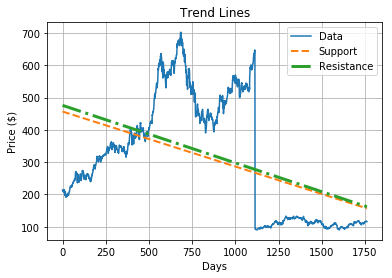

In [88]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
def fit_line(t, y):
    ''' Fits t to a line y = at + b '''
    A = np.vstack([t, np.ones_like(t)]).T
    return np.linalg.lstsq(A, y)[0]
# Determine pivots
h, l, c = np.loadtxt('prices.csv', delimiter=',', usecols=(5,4,3),
unpack=True)
pivots = (h + l + c) / 3
print("Pivots", pivots)
# Fit trend lines

t = np.arange(len(c))
sa, sb = fit_line(t, pivots - (h - l))
ra, rb = fit_line(t, pivots + (h - l))
support = sa * t + sb
resistance = ra * t + rb
condition = (c > support) & (c < resistance)
print("Condition", condition)
between_bands = np.where(condition)
print(support[between_bands])
print(c[between_bands])
print(resistance[between_bands])
between_bands = len(np.ravel(between_bands))

print("Number points between bands", between_bands)
print("Ratio between bands", float(between_bands)/len(c))
print("Tomorrows support", sa * (t[-1] + 1) + sb)
print("Tomorrows resistance", ra * (t[-1] + 1) + rb)
a1 = c[c > support]
a2 = c[c < resistance]
print("Number of points between bands 2nd approach" ,len(np.
intersect1d(a1, a2)))
# Plotting
plt.plot(t, c, label='Data')
plt.plot(t, support, '--', lw=2.0, label='Support')
plt.plot(t, resistance, '-.', lw=3.0, label='Resistance')
plt.title('Trend Lines')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()
plt.show()

# Methods of ndarray
The NumPy ndarray class has a lot of methods that work on the array. Most of the time,
these methods return an array. You may have noticed that many of the functions part of the
NumPy library have a counterpart with the same name and functionality in the ndarray
class. This is mostly due to the historical development of NumPy.
The list of ndarray methods is pretty long, so we cannot cover them all. The mean(),
var(), sum(), std(), argmax(), argmin(), and mean() functions that we saw earlier
are also ndarray methods.

# Time for action – clipping and compressing arrays
Here are a few examples of ndarray methods. Perform the following steps to clip and
compress arrays:
1. The clip() method returns a clipped array, so that all values above a maximum
value are set to the maximum and values below a minimum are set to the minimum
value. Clip an array with values 0 to 4 to 1 and 2:


In [89]:
a = np.arange(5)
print("a =", a)
print("Clipped", a.clip(1, 2))

a = [0 1 2 3 4]
Clipped [1 1 2 2 2]


In [90]:
a = np.arange(4)
print(a)
print("Compressed", a.compress(a > 2))


[0 1 2 3]
Compressed [3]


## Factorial
Many programming books have an example of calculating the factorial. We should not break
with this tradition.
## Time for action – calculating the factorial
The ndarray class has the prod() method, which computes the product of the elements in
an array. Perform the following steps to calculate the factorial:

In [91]:
b = np.arange(1, 9)
print("b =", b)
print("Factorial", b.prod())


b = [1 2 3 4 5 6 7 8]
Factorial 40320


In [92]:
print("Factorials", b.cumprod())

Factorials [    1     2     6    24   120   720  5040 40320]


# What just happened?
We used the prod() and cumprod() functions to calculate factorials (see
ndarraymethods.py):

In [93]:
from __future__ import print_function
import numpy as np
a = np.arange(5)
print("a =", a)
print("Clipped", a.clip(1, 2))
a = np.arange(4)
print(a)
print("Compressed", a.compress(a > 2))
b = np.arange(1, 9)
print("b =", b)
print("Factorial", b.prod())
print("Factorials", b.cumprod())

a = [0 1 2 3 4]
Clipped [1 1 2 2 2]
[0 1 2 3]
Compressed [3]
b = [1 2 3 4 5 6 7 8]
Factorial 40320
Factorials [    1     2     6    24   120   720  5040 40320]


# Missing values and Jackknife resampling
Data often misses values because of errors or technical issues. Even if we are not missing
values, we may have cause to suspect certain values. Once we doubt data values, derived
values such as the arithmetic mean, which we learned to calculate in this chapter, become
questionable too. It is common for these reasons to try to estimate how reliable the
arithmetic mean, variance, and standard deviation are.

# Time for action – handling NaNs with the nanmean(), nanvar(),
and nanstd() functions
We will apply jackknife resampling to the stock data. Each value will be omitted by setting it
to Not a Number (NaN). The nanmean(), nanvar(), and nanstd() can then be used to
compute the arithmetic mean, variance, and standard deviation.

1. First, initialize a 30-by-3 array for the estimates as follows:
estimates = np.zeros((len(c), 3))

In [94]:
estimates = np.zeros((len(c), 3))

In [95]:
for i in range(len(c)):
    a = c.copy()
    a[i] = np.nan
    estimates[i,] = [np.nanmean(a), np.nanvar(a), np.nanstd(a)]

In [96]:
print("Estimates variance", estimates.var(axis=0))

Estimates variance [1.10476164e-02 2.49554475e+02 1.82147726e-03]


# What just happened?
We estimated the variances of the arithmetic mean, variance, and standard deviation of a
small dataset using jackknife resampling. This gives us an idea of how much the arithmetic
mean, variance, and standard deviation vary. The code for this example can be found in the
jackknife.py file in this book's code bundle:


In [97]:
from __future__ import print_function
import numpy as np
c = np.loadtxt('prices.csv', delimiter=',', usecols=(3,), unpack=True)
# Initialize estimates array
estimates = np.zeros((len(c), 3))
for i in range(len(c)):
    # Create a temporary copy and omit one value
    a = c.copy()
    a[i] = np.nan
    # Compute estimates
    estimates[i,] = [np.nanmean(a), np.nanvar(a), np.nanstd(a)]
print("Estimates variance", estimates.var(axis=0))

Estimates variance [1.10476164e-02 2.49554475e+02 1.82147726e-03]


# Summary
This chapter informed us about a great number of common NumPy functions. A few
common statistics functions were also mentioned.